# Librerias

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Definicion del camino de alta simetria

In [68]:
a = 1 # Parámetro de red
alpha = 1.0 # Parámetro de acoplamiento
gamma = 0.5 # Parámetro de interacción

# Definición de puntos de alta simetría (Kx, Ky, Kz)
G  = np.array([0.0,         0.0,         0.0        ])  # Gamma
X  = np.array([0.0,         0.5,         0.0        ])  # Medio de cara
M  = np.array([0.5,         0.5,         0.0        ])  # Medio de arista
R  = np.array([0.5,         0.5,         0.5        ])  # Vértice del cubo

# Camino de alta simetría que se va a recorrer
k_points = [G, X, M, R, G]

# # Reutilizacion del codigo de parametrizacion del proyecto
def parametrization_vec(k_points, n_points):
    path = []
    for i in range(len(k_points) - 1):
        inicio = k_points[i]
        fin    = k_points[i + 1]
        tramo  = np.linspace(inicio, fin, n_points, endpoint=False)
        path.extend(tramo)
    path.append(k_points[-1])
    return np.array(path)

n_points_segment = 100
k_path = parametrization_vec(k_points, n_points_segment)

n_k = len(k_path)
print(np.shape(k_path))

(401, 3)


# Calculo y graficación de la función

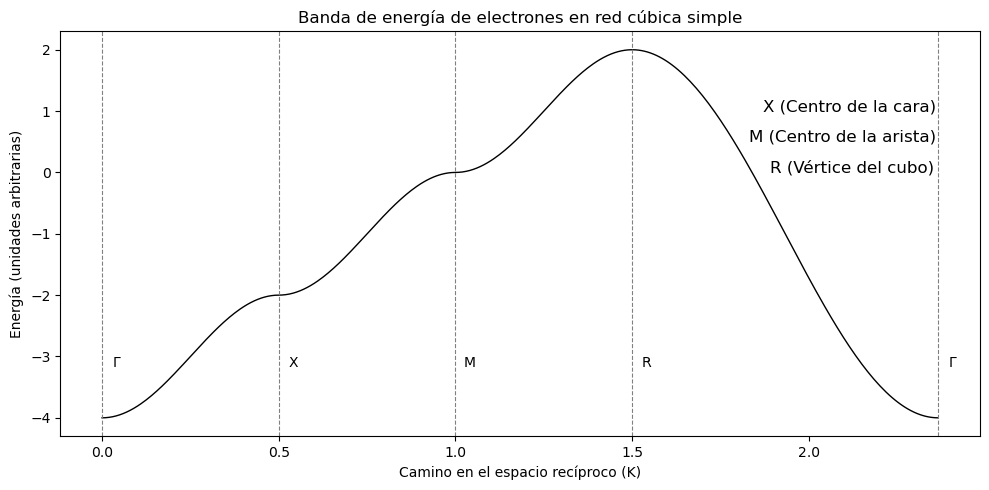

In [69]:
# Calculo de la banda de energía
energy_band = - alpha - 2 * gamma * np.sum(np.cos( 2 * np.pi * k_path * a ), axis=1)

# Cálculo de la norma de k para graficar en función de la distancia en el espacio recíproco
dK = np.linalg.norm( np.diff(k_path, axis=0), axis=1 )
K_norm = np.concatenate(([0], np.cumsum(dK)))
# Reutilizacion del codigo de graficacion del proyecto
labels = ["Γ", "X", "M", "R", "Γ"]
plt.figure(figsize=(10,5))
plt.plot(K_norm, energy_band, 'k-', linewidth=1)
for i in range(5):
    plt.axvline(K_norm[100 * i], color='gray', linestyle='--', linewidth=0.8)
    plt.text(K_norm[100 * i]+0.04, -3, labels[i], ha='center', va='top')
plt.text(1.87, 1, "X (Centro de la cara)", fontsize=12)
plt.text(1.83, 0.5, "M (Centro de la arista)", fontsize=12)
plt.text(1.89, 0, "R (Vértice del cubo)", fontsize=12)
plt.ylabel("Energía (unidades arbitrarias)")
plt.xlabel("Camino en el espacio recíproco (K)")
plt.title("Banda de energía de electrones en red cúbica simple")
plt.tight_layout()
plt.show()